In [1]:
pip install fairlearn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, train_test_split

  
# fetch dataset 
statlog_german_credit_data = fetch_ucirepo(id=144) 
  
# data (as pandas dataframes) 
X = statlog_german_credit_data.data.features 
y = statlog_german_credit_data.data.targets 
  

# metadata 
print(statlog_german_credit_data.metadata) 
  
# variable information 
print(statlog_german_credit_data.variables) 


print(X.head())
print(y.head())

{'uci_id': 144, 'name': 'Statlog (German Credit Data)', 'repository_url': 'https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data', 'data_url': 'https://archive.ics.uci.edu/static/public/144/data.csv', 'abstract': 'This dataset classifies people described by a set of attributes as good or bad credit risks. Comes in two formats (one all numeric). Also comes with a cost matrix', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1000, 'num_features': 20, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Other', 'Marital Status', 'Age', 'Occupation'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5NC77', 'creators': ['Hans Hofmann'], 'intro_paper': None, 'additional_info': {'summary': 'Two datasets are provided.  the original dataset, in the form provided by

In [3]:
def replace_values_with_binary(df, column_name, values_list):
    # Check if the column exists in the dataframe
    assert column_name  in df.columns, "Column name is not correct. It should be in df.column"

    df[column_name] = df[column_name].apply(lambda x: 1 if x in values_list else 0)

    return df




In [4]:
replace_values_with_binary(X,"Attribute9",["A91","A93","A94"])# transform Attribute9 it into gender column
replace_values_with_binary(y,y.columns[0],[2])# transform Attribute9 it into gender column
print(X[["Attribute9", "Attribute13"]])
print(y)

num_features=["Attribute2", "Attribute5", "Attribute8", "Attribute11", "Attribute13", "Attribute16", "Attribute18"]
cat_features=[col_name for col_name in X.columns if col_name not in num_features]
X = pd.get_dummies(X, columns = cat_features)
print("New x ", X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2)



     Attribute9  Attribute13
0             1           67
1             0           22
2             1           49
3             1           45
4             1           53
..          ...          ...
995           0           31
996           1           40
997           1           38
998           1           23
999           1           27

[1000 rows x 2 columns]
     class
0        0
1        1
2        0
3        0
4        1
..     ...
995      0
996      0
997      0
998      1
999      0

[1000 rows x 1 columns]
New x  (1000, 59)


C:\Users\Razvan\AppData\Local\Temp\ipykernel_18252\2944808635.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df[column_name].apply(lambda x: 1 if x in values_list else 0)
C:\Users\Razvan\AppData\Local\Temp\ipykernel_18252\2944808635.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df[column_name].apply(lambda x: 1 if x in values_list else 0)


<Axes: xlabel='class'>

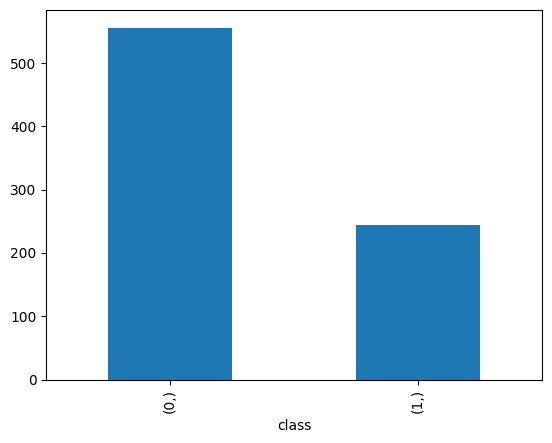

In [7]:
#y.value_counts().plot.bar()
y_train.value_counts().plot.bar()

In [10]:
#########MODEL 



# Step 3: Define the parameter grid
param_grid = {
    'n_estimators': [10,50, 100],
    'max_depth': [10, 20,30,50],
    'min_samples_leaf': [2, 4,8]
}

# Step 4: Create the Random Forest model
rf_model = RandomForestClassifier()

# Step 5: Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

# Step 6: Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Step 7: Retrieve the best parameters and best estimator
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_


# Get the accuracy obtained in the grid search
grid_search_accuracy = grid_search.best_score_

# Print the best parameters and accuracy
print("Best Parameters:", best_params)
print("Grid Search Accuracy:", grid_search_accuracy)


e:\Python_install\Lib\site-packages\sklearn\model_selection\_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'n_estimators': 100}
Grid Search Accuracy: 0.7550000000000001


In [11]:
from fairlearn.metrics import equalized_odds_difference
print(equalized_odds_difference(y_train,best_rf_model.predict(X_train), sensitive_features=X_train["Attribute9_0"]))


0.0041730726993192135
